<a href="https://colab.research.google.com/github/ryanfernald/San-Jose-Employment-Analysis/blob/main/Job_Title_Total_Cash_Compensation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

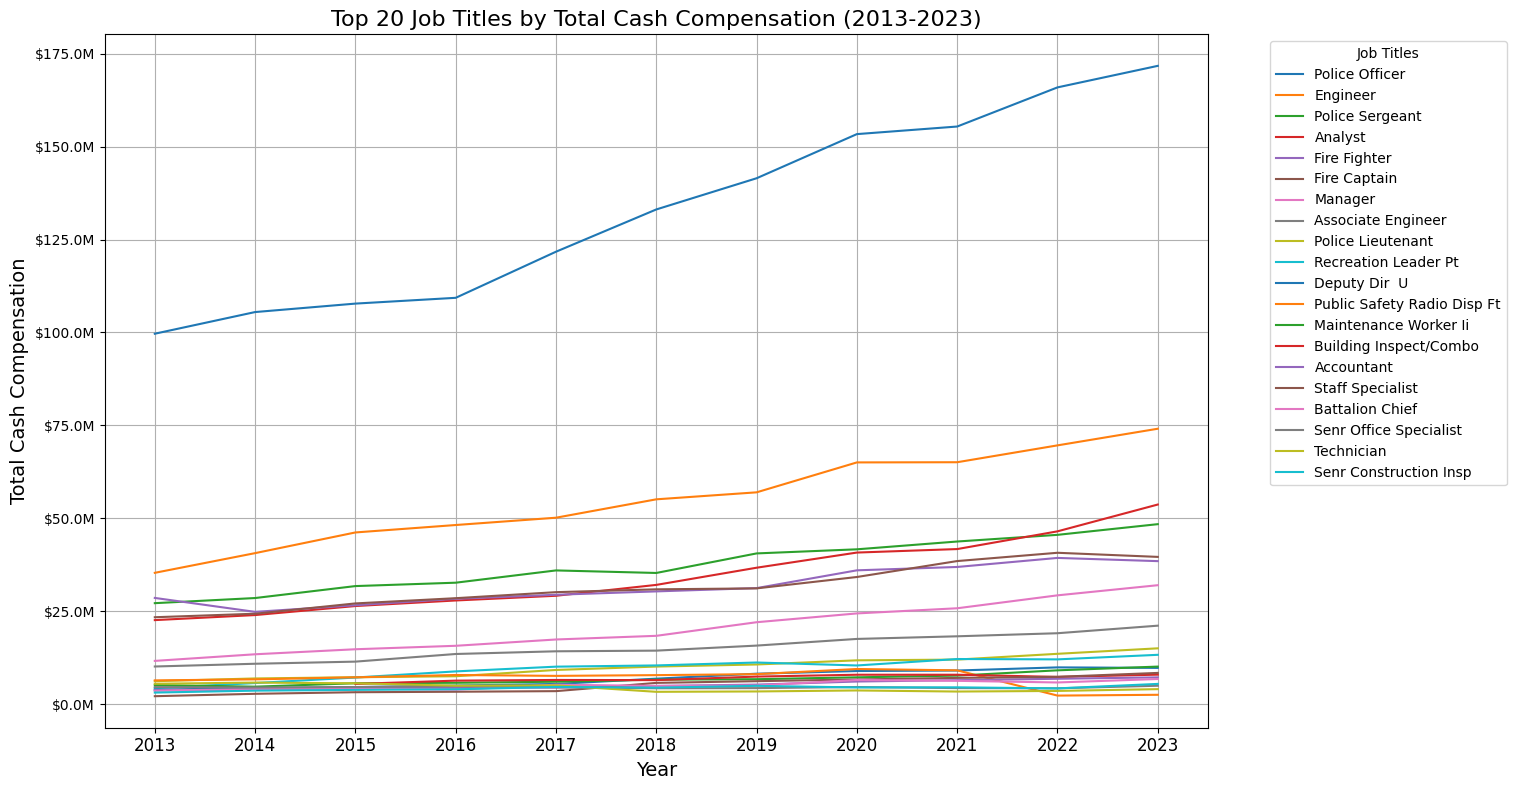

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

file_path = 'sample_data/df_all_years_clean.csv'
df = pd.read_csv(file_path)

def map_to_major_jobtitle(jobtitle_name):
    jobtitle_name = jobtitle_name.lower()
    if 'account clerk' in jobtitle_name:
        return 'Account Clerk'
    if 'accountant' in jobtitle_name:
        return 'Accountant'
    if 'adminstrative assist' in jobtitle_name:
        return 'Administrative Assistant'
    if 'airport oper manager' in jobtitle_name:
        return 'Airport Operations Manager'
    if 'airport oper supvr' in jobtitle_name:
        return 'Airport Operations Supervisor'
    if 'analyst' in jobtitle_name:
        return 'Analyst'
    if 'animal care attendant' in jobtitle_name:
        return 'Animal Care Attendant'
    if 'animal health assistant' in jobtitle_name:
        return 'Animal Health Assistant'
    if 'animal health tech' in jobtitle_name:
        return 'Animal Health Technician'
    if 'animal shelter vete' in jobtitle_name:
        return 'animal Shelter Veterinrian'
    if 'assit to the city mgr' in jobtitle_name:
        return 'Assistant to the City Manager'
    if 'assoc engineer' in jobtitle_name:
        return 'Associate Engineer'
    if 'background investigator' in jobtitle_name:
        return 'Background Investigator'
    if 'bartender' in jobtitle_name:
        return 'Bartender'
    if 'bldg inspect combo' in jobtitle_name:
        return 'Building Inspect/Combo'
    if 'bldg inspect, supvr' in jobtitle_name:
        return 'Building Inspector, Supvr Cert'
    if 'building rehab insp' in jobtitle_name:
        return 'Building Rehab Inspector'
    if 'business analyst' in jobtitle_name:
        return 'Business Analyst'
    if 'buyer' in jobtitle_name:
        return 'Buyer'
    if 'chemist' in jobtitle_name:
        return 'Chemist'
    if 'analyst' in jobtitle_name:
        return 'Analyst'
    if 'manager' in jobtitle_name:
        return 'Manager'
    if 'engineer' in jobtitle_name:
        return 'Engineer'
    if 'technician' in jobtitle_name:
        return 'Technician'
    return jobtitle_name.title()

df['Job Title'] = df['Job Title'].apply(map_to_major_jobtitle)
df_grouped = df.groupby(['Job Title', 'Year'], as_index=False)['Total Cash Compensation'].sum()
df_pivot = df_grouped.pivot(index='Year', columns='Job Title', values='Total Cash Compensation')

total_compensation = df_grouped.groupby('Job Title')['Total Cash Compensation'].sum()
top_20_job_titles = total_compensation.nlargest(20).index
df_top_20 = df_pivot[top_20_job_titles]

def millions_formatter(x, pos):
    return f"${x * 1e-6:.1f}M"

plt.figure(figsize=(15, 8))
for job_title in df_top_20.columns:
    plt.plot(df_top_20.index, df_top_20[job_title], label=job_title)

plt.xticks(range(2013, 2024), fontsize=12)
plt.title('Top 20 Job Titles by Total Cash Compensation (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cash Compensation', fontsize=14)
plt.legend(title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


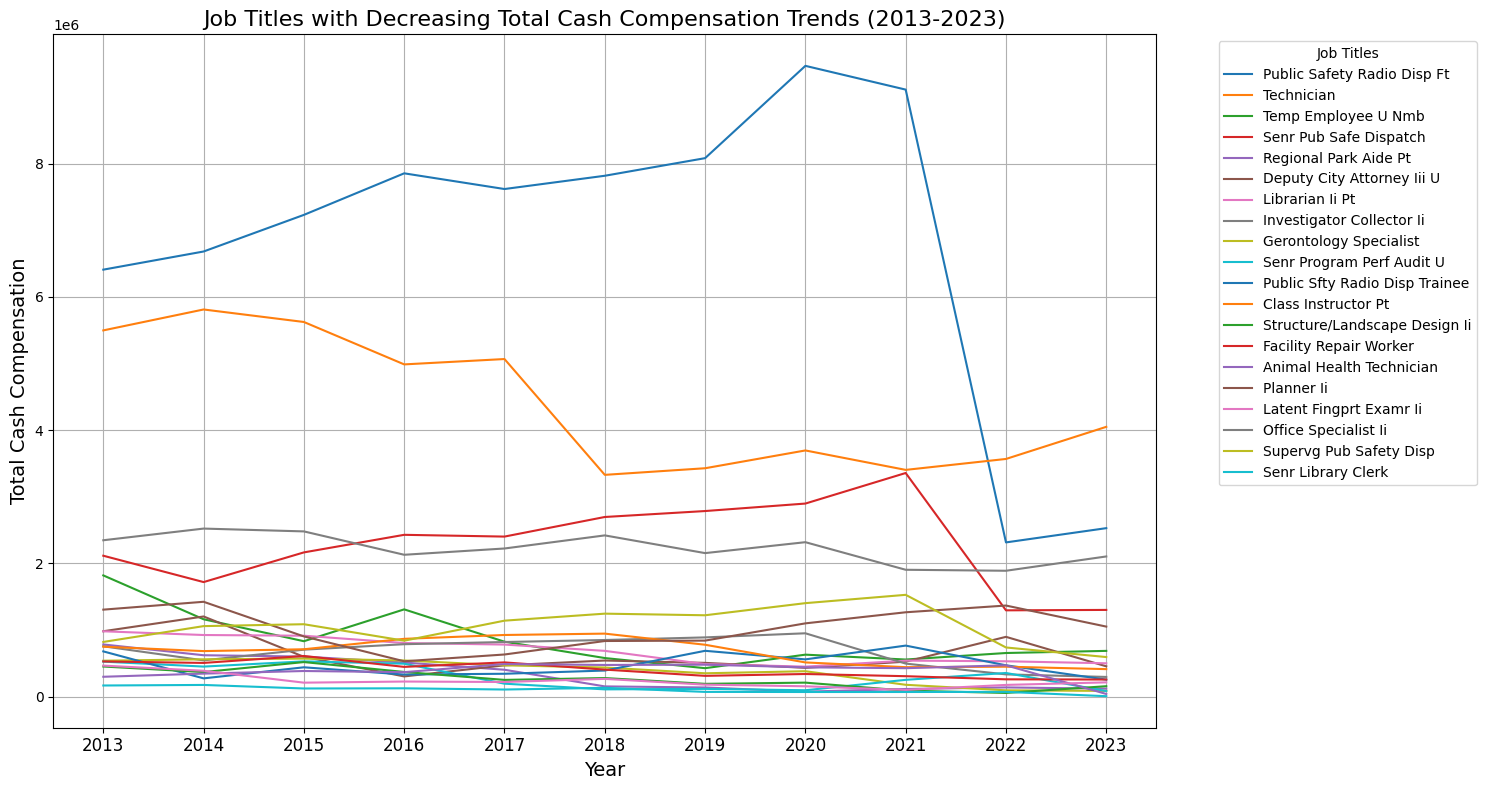

In [ ]:
job_title_changes = df_pivot.iloc[-1] - df_pivot.iloc[0]
biggest_downfall_titles = job_title_changes.nsmallest(20).index
df_biggest_downfall = df_pivot[biggest_downfall_titles]

plt.figure(figsize=(15, 8))
for job_title in df_biggest_downfall.columns:
    plt.plot(df_biggest_downfall.index, df_biggest_downfall[job_title], label=job_title)

plt.xticks(range(2013, 2024), fontsize=12)
plt.title('Job Titles with Decreasing Total Cash Compensation Trends (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cash Compensation', fontsize=14)
plt.legend(title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()